<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# Cours TAL - Laboratoire 4<br/>Reconnaissance des entités nommées

**Objectif**

L'objectif de ce travail est de comparer la reconnaissance des entités nommées (*named entity recognition*, NER) faite par quatre systèmes : NLTK, spaCy (deux modèles, 'en_core_web_sm' et 'en_core_web_lg'), et DistilBERT/NER.  Les données de test en anglais vous sont fournies sur Cyberlearn au format CoNLL.  Pour comparer les systèmes, on utilise la macro-moyenne des scores f1 pour chaque étiquette.  Vous pouvez concevoir l'ensemble du projet par vous-mêmes, ou suivre les indications suivantes.

## 1. NER avec spaCy et NLTK sur un texte court

In [1]:
import spacy
from spacy.tokens import Doc

In [2]:
#!python -m spacy download en_core_web_sm
# exécuter la ligne ci-dessus une fois, si nécessaire, idem pour en_core_web_lg

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
raw_text = "Reinhold Messner made a solo ascent of Mount Everest and was later a member of the European Parliament." 

**1a.** Veuillez traiter ce texte avec la pipeline 'nlp', et pour chaque entité nommée trouvée veuillez afficher les mots qui la composent et son type.

In [5]:
doc = nlp(raw_text)

print("Tokens and their POS tags:")
for token in doc:
    print(f"{token.text}: {token.pos_}")

Tokens and their POS tags:
Reinhold: PROPN
Messner: PROPN
made: VERB
a: DET
solo: ADJ
ascent: NOUN
of: ADP
Mount: PROPN
Everest: PROPN
and: CCONJ
was: AUX
later: ADV
a: DET
member: NOUN
of: ADP
the: DET
European: PROPN
Parliament: PROPN
.: PUNCT


In [6]:
import nltk
#nltk.download('maxent_ne_chunker') 
#nltk.download('words') 
# exécuter les deux lignes ci-dessus une fois, si nécessaire

**1b.** Veuillez effectuer avec NLTK la tokenization, le POS tagging et le *NE chunking* de `raw_text` (voir la [documentation NLTK](https://www.nltk.org/api/nltk.chunk.ne_chunk.html#nltk.chunk.ne_chunk)).  Veuillez afficher le résultat et indiquer son type.

In [7]:
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree

def extract_entities(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Perform POS tagging
    pos_tags = pos_tag(tokens)
    
    # Perform Named Entity Recognition
    named_entities = ne_chunk(pos_tags)

    entities = []
    for subtree in named_entities:
        if isinstance(subtree, Tree):
            entity_name = " ".join([word for word, tag in subtree.leaves()])
            entity_type = subtree.label()
            entities.append((entity_name, entity_type))
    
    return entities, named_entities

In [8]:
entities, named_entities = extract_entities(raw_text)

print("\nNamed Entities:")
for entity in entities:
    print(f"{entity[0]}: {entity[1]}")



Named Entities:
Reinhold: PERSON
Messner: PERSON
Mount Everest: PERSON
European Parliament: ORGANIZATION


**1c.** Veuillez afficher, pour chaque entité nommée, les mots qui la composent et son type.  Vous pouvez parcourir le résultat précédent avec une boucle `for`, et déterminer si un noeud possède une étiquette avec la fonction `hasattr(noeud, 'label')`.

In [9]:
def print_tree(tree, indent="  "):
    if isinstance(tree, Tree):
        print(indent + str(tree.label()))
        for child in tree:
            print_tree(child, indent + "  ")
    else:
        print(indent + str(tree))


In [10]:
print_tree(named_entities)

  S
    PERSON
      ('Reinhold', 'NNP')
    PERSON
      ('Messner', 'NNP')
    ('made', 'VBD')
    ('a', 'DT')
    ('solo', 'JJ')
    ('ascent', 'NN')
    ('of', 'IN')
    PERSON
      ('Mount', 'NNP')
      ('Everest', 'NNP')
    ('and', 'CC')
    ('was', 'VBD')
    ('later', 'RB')
    ('a', 'DT')
    ('member', 'NN')
    ('of', 'IN')
    ('the', 'DT')
    ORGANIZATION
      ('European', 'NNP')
      ('Parliament', 'NNP')
    ('.', '.')


**1d.** À ce stade, que pensez-vous de la qualité des résultats de chaque système ?

*Réponse :*

*Nltk est plus précis que spacy. Il donne aussi plus d'informations sur les entités nommées. Par exemple, il donne le type de l'entité nommée (personne, organisation, etc.) et lie les entités qui le sont. Par exemple ici, "Mount Everest" est une seul entité nommée, alors que spacy le découpe en deux entités nommées. Il y a aussi quelques différences sur les type des mots comme avec "was" qui est un "AUX" pour Spacy et un "VBD" pour Nltk.*

## 2. Prise en main des données de test

**2a.** Quel est le format du fichier `eng.test.a.conll` ?  Quelle information contient chaque colonne ?  Quel est le format des tags NE ?

Note : ce fichier fait partie des données de test pour la NER sur l'anglais de la conférence [CoNLL](https://www.clips.uantwerpen.be/pages/past-workshops) 2003. On peut lire [ici](https://www.clips.uantwerpen.be/conll2003/ner/) la description de la tâche et les scores obtenus.  On peut trouver une copie des données [ici](https://sourceforge.net/p/text-analysis/svn/1243/tree/text-analysis/trunk/Corpora/CoNLL/2003/) ou [ici](https://github.com/synalp/NER/tree/master/corpus/CoNLL-2003).  Les textes proviennent du [corpus Reuters](http://trec.nist.gov/data/reuters/reuters.html).

The first item on each line is a word, the second a part-of-speech (POS) tag, the third a syntactic chunk tag and the fourth the named entity tag.

*Réponse :*

*Le format du fichier est un fichier texte avec une ligne par mot. Chaque ligne contient 4 colonnes séparées par des espaces. La première colonne contient le mot, la deuxième le tag de la partie du discours (POS), la troisième le tag de la syntaxe et la quatrième le tag de l'entité nommée (NE).*

*Le format des tags NE est I-TYPE, ce qui signifie que le mot se trouve à l'intérieur d'une phrase de type TYPE. Ce n'est que si deux phrases du même type se suivent immédiatement que le premier mot de la deuxième phrase aura l'étiquette B-TYPE pour montrer qu'il commence une nouvelle phrase. Un mot portant l'étiquette O ne fait pas partie d'une phrase. TYPE peut être PER (personne), LOC (lieu), ORG (organisation) ou MISC (divers).*

**2b.** Veuillez charger les données de `eng.test.a.conll` grâce à la classe `ConllCorpusReader` de NLTK vue dans les labos précédents (voir [documentation](https://www.nltk.org/api/nltk.corpus.reader.conll.html#nltk.corpus.reader.conll.ConllCorpusReader)). Veuillez lire les colonnes qui contiennent les tokens ('words'), les POS tags ('pos') et les informations sur les entités nommées ('chunk') et afficher les quatre premières phrases, accessibles via la méthode `.iob_sents()`.

In [11]:
from nltk.corpus.reader.conll import ConllCorpusReader

In [12]:
conll_corpus = ConllCorpusReader('.', 'eng.test.a.conll', ['words', 'pos', 'ignore', 'chunk'])

In [13]:
print("\nConll Corpus:")
for sentence in conll_corpus.iob_sents()[1:5]:
    print(sentence)


Conll Corpus:
[('CRICKET', 'NNP', 'O'), ('-', ':', 'O'), ('LEICESTERSHIRE', 'NNP', 'I-ORG'), ('TAKE', 'NNP', 'O'), ('OVER', 'IN', 'O'), ('AT', 'NNP', 'O'), ('TOP', 'NNP', 'O'), ('AFTER', 'NNP', 'O'), ('INNINGS', 'NNP', 'O'), ('VICTORY', 'NN', 'O'), ('.', '.', 'O')]
[('LONDON', 'NNP', 'I-LOC'), ('1996-08-30', 'CD', 'O')]
[('West', 'NNP', 'I-MISC'), ('Indian', 'NNP', 'I-MISC'), ('all-rounder', 'NN', 'O'), ('Phil', 'NNP', 'I-PER'), ('Simmons', 'NNP', 'I-PER'), ('took', 'VBD', 'O'), ('four', 'CD', 'O'), ('for', 'IN', 'O'), ('38', 'CD', 'O'), ('on', 'IN', 'O'), ('Friday', 'NNP', 'O'), ('as', 'IN', 'O'), ('Leicestershire', 'NNP', 'I-ORG'), ('beat', 'VBD', 'O'), ('Somerset', 'NNP', 'I-ORG'), ('by', 'IN', 'O'), ('an', 'DT', 'O'), ('innings', 'NN', 'O'), ('and', 'CC', 'O'), ('39', 'CD', 'O'), ('runs', 'NNS', 'O'), ('in', 'IN', 'O'), ('two', 'CD', 'O'), ('days', 'NNS', 'O'), ('to', 'TO', 'O'), ('take', 'VB', 'O'), ('over', 'IN', 'O'), ('at', 'IN', 'O'), ('the', 'DT', 'O'), ('head', 'NN', 'O'), 

**2c.** Veuillez préparer les données pour le test, en ne gardant que les phrases ayant au moins trois (3) tokens (pas 0, 1, 2) :

* une variable `test_tokens` contiendra les tokens groupés par phrase (liste de listes de strings)
* une variable `test_tags` contiendra tous les tags NE en une seule liste (en vue de l'évaluation)

In [14]:
test_tags = []
test_tokens = []

for sentence in conll_corpus.iob_sents():
    tokens_length = len(sentence)
    if tokens_length >= 3: # Ignore sentences with less than 3 tokens
        test_tokens.append([token for token, _, _ in sentence]) # Extract tokens
        for _, _, tag in sentence: # Extract tags
            test_tags.append(tag)

In [15]:
print("\nExemple Test Tokens:")
for tokens in test_tokens[:5]:
    print(tokens)

print("\nExemple Test Tags:")
for tags in test_tags[:12]:
    print(tags)


Exemple Test Tokens:
['CRICKET', '-', 'LEICESTERSHIRE', 'TAKE', 'OVER', 'AT', 'TOP', 'AFTER', 'INNINGS', 'VICTORY', '.']
['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
['Their', 'stay', 'on', 'top', ',', 'though', ',', 'may', 'be', 'short-lived', 'as', 'title', 'rivals', 'Essex', ',', 'Derbyshire', 'and', 'Surrey', 'all', 'closed', 'in', 'on', 'victory', 'while', 'Kent', 'made', 'up', 'for', 'lost', 'time', 'in', 'their', 'rain-affected', 'match', 'against', 'Nottinghamshire', '.']
['After', 'bowling', 'Somerset', 'out', 'for', '83', 'on', 'the', 'opening', 'morning', 'at', 'Grace', 'Road', ',', 'Leicestershire', 'extended', 'their', 'first', 'innings', 'by', '94', 'runs', 'before', 'being', 'bowled', 'out', 'for', '296', 'with', 'England', '

**2d.** Combien d'occurrences de tags contient `test_tags`?  Combien de tags différents y a-t-il, et lesquels sont-ils ?  Combien il y a d'occurrences de tags de chaque type ?  Combien de phrases y a-t-il dans `test_tokens` ?

In [16]:
print("Nombre d'occurences de test_tags: " + str(len(test_tags)))
print("Nombre de tags uniques: " + str(len(set(test_tags))))
print(set(test_tags))
print("Nombre d'occurences de chaque tag: " + str({tag: test_tags.count(tag) for tag in set(test_tags)}))

print("Nombre de phrases dans le corpus de test: " + str(len(test_tokens)))

Nombre d'occurences de test_tags: 50817
Nombre de tags uniques: 5
{'O', 'I-MISC', 'I-PER', 'I-ORG', 'I-LOC'}
Nombre d'occurences de chaque tag: {'O': 42474, 'I-MISC': 1228, 'I-PER': 3097, 'I-ORG': 2080, 'I-LOC': 1938}
Nombre de phrases dans le corpus de test: 2970


## 3. Performances de NLTK pour la NER

**3a.** Le NER de NLTK a un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertit chaque tag du NER de NLTK vers le tag correspondant pour les données de test. 

In [17]:
def convert_nltk_conll(nltk_tag):
  corresp = {
    'O': 'O',
    'ORGANIZATION': 'I-ORG',
    'PERSON': 'I-PER',
    'LOCATION': 'I-LOC',
    'GPE': 'I-LOC',
    'FACILITY': 'I-LOC',
    'MISC': 'I-MISC'
  }
  return corresp.get(nltk_tag, 'I-MISC')
                


**3b.** Veuillez exécuter la NER de NLTK sur chacune des phrases de `test_tokens`, ce qui assure que NLTK aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `nltk_tags`.

In [18]:
nltk_tags = []

for sentence in test_tokens:
    chunks = nltk.ne_chunk(nltk.pos_tag(sentence))
    for subtree in chunks:
        if hasattr(subtree, 'label'):
            nltk_tags += [subtree.label() for leaf in subtree.leaves()]
        else:
            nltk_tags.append('O')


**3c.** Veuillez convertir les tags de `nltk_tags` grâce à la fonction précédente, dans une liste appelée `nltk_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [19]:
nltk_tags_conv = [convert_nltk_conll(tag) for tag in nltk_tags]

print('TEST\tNLTK\tCONNLU')
for i in range(10):
    print(test_tags[i],'\t',nltk_tags[i],'\t',nltk_tags_conv[i])


TEST	NLTK	CONNLU
O 	 GPE 	 I-LOC
O 	 O 	 O
I-ORG 	 ORGANIZATION 	 I-ORG
O 	 O 	 O
O 	 O 	 O
O 	 O 	 O
O 	 ORGANIZATION 	 I-ORG
O 	 O 	 O
O 	 ORGANIZATION 	 I-ORG
O 	 O 	 O


**3d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

Classification Report :

              precision    recall  f1-score   support

       I-LOC       0.55      0.72      0.62      1938
      I-MISC       0.16      0.01      0.01      1228
       I-ORG       0.51      0.35      0.41      2080
       I-PER       0.77      0.74      0.76      3097
           O       0.96      0.99      0.97     42474

    accuracy                           0.91     50817
   macro avg       0.59      0.56      0.56     50817
weighted avg       0.89      0.91      0.90     50817



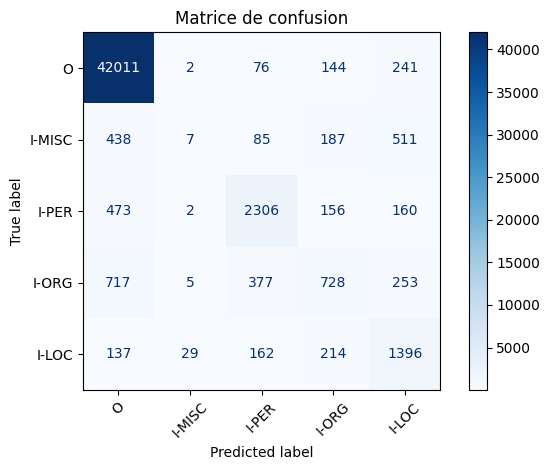

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

report = classification_report(test_tags, nltk_tags_conv)
print("Classification Report :\n")
print(report)

cm = confusion_matrix(test_tags, nltk_tags_conv, labels=list(set(test_tags + nltk_tags_conv)))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(test_tags + nltk_tags_conv)))
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title('Matrice de confusion')
plt.tight_layout()
plt.show()

## 4. Performances de spaCy pour la NER

**4a.** Le NER de spaCy a aussi un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertir chaque tag du NER de spaCy dans le tag correspondant pour les données de test.  Attention à la logique des conversions. 

In [21]:
def convert_spacy_conll(spacy_tag):
    if spacy_tag in ["PERSON"]:
        return "I-PER"
    elif spacy_tag in ["ORG"]:
        return "I-ORG"
    elif spacy_tag in ["GPE", "LOC", "FAC"]:
        return "I-LOC"
    elif spacy_tag in ["NORP", "EVENT", "WORK_OF_ART", "LANGUAGE", "LAW", "PRODUCT"]:
        return "I-MISC"
    else:
        return "O"

**4b.** Veuillez exécuter la NER de spaCy sur chacune des phrases de `test_tokens`, ce qui assure que spaCy aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `spacy_tags`.

In [22]:
import spacy
from spacy.tokens import Doc

# Charger le modèle de base
nlp = spacy.load("en_core_web_sm")

spacy_tags = []

for sentence in test_tokens:
    # Créer un Doc à partir des tokens originaux
    doc = Doc(nlp.vocab, words=sentence)
    # Appliquer le pipeline spaCy (ner notamment)
    doc = nlp(doc)

    # Récupérer les entités token par token
    for token in doc:
        if token.ent_iob_ == "O":
            spacy_tags.append("O")
        else:
            spacy_tags.append(token.ent_type_)


**4c.** Veuillez convertir les tags de `spacy_tags` grâce à la fonction précédente, dans une liste appelée `spacy_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [23]:
from sklearn.metrics import f1_score

# Conversion des tags spaCy en tags CoNLL
spacy_tags_conv = [convert_spacy_conll(tag) for tag in spacy_tags]

# Affichage
print("Nombre total de tags :", len(spacy_tags_conv))
print("10 premiers tags convertis :", spacy_tags_conv[:10])

# Score
f1 = f1_score(test_tags, spacy_tags_conv, average="weighted", zero_division=0)
print(f"Score F1 pondéré : {f1:.4f}")

Nombre total de tags : 50817
10 premiers tags convertis : ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Score F1 pondéré : 0.9271


**4d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

Classification Report :

              precision    recall  f1-score   support

       I-LOC       0.79      0.80      0.80      1938
      I-MISC       0.70      0.62      0.66      1228
       I-ORG       0.52      0.52      0.52      2080
       I-PER       0.83      0.71      0.77      3097
           O       0.97      0.98      0.97     42474

    accuracy                           0.93     50817
   macro avg       0.76      0.73      0.74     50817
weighted avg       0.93      0.93      0.93     50817



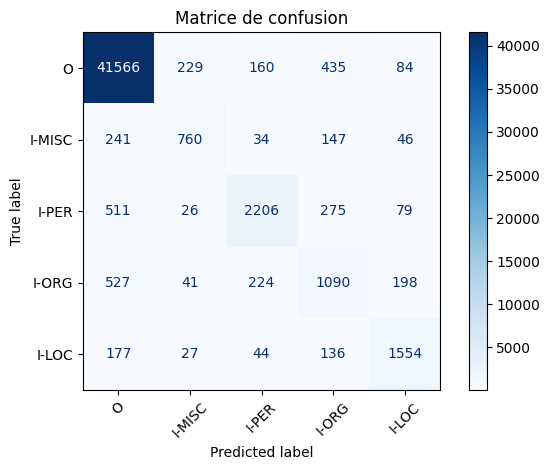

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

report = classification_report(test_tags, spacy_tags_conv)
print("Classification Report :\n")
print(report)

cm = confusion_matrix(test_tags, spacy_tags_conv, labels=list(set(test_tags + spacy_tags_conv)))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(test_tags + spacy_tags_conv)))
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title('Matrice de confusion')
plt.tight_layout()
plt.show()

**4e.** Veuillez exécuter également le modèle 'en_core_web_lg' de spacy et afficher le rapport d'évaluation (il n'est pas demander d'afficher la matrice de confusion).  Vous pouvez recopier ici le minimum de code nécessaire à l'obtention des résultats, avec une nouvelle pipeline spaCy appelée 'nlp2'.

In [25]:
#!python -m spacy download en_core_web_lg


In [26]:
nlp2 = spacy.load("en_core_web_lg")

spacy_tags_lg = []

for sentence in test_tokens:
    doc = Doc(nlp2.vocab, words=sentence)
    doc = nlp2(doc)
    for token in doc:
        if token.ent_iob_ == "O":
            spacy_tags_lg.append("O")
        else:
            spacy_tags_lg.append(token.ent_type_)

spacy_tags_conv_lg = [convert_spacy_conll(tag) for tag in spacy_tags_lg]

# rapport
print(classification_report(test_tags, spacy_tags_conv_lg, zero_division=0))

              precision    recall  f1-score   support

       I-LOC       0.75      0.87      0.81      1938
      I-MISC       0.84      0.67      0.74      1228
       I-ORG       0.55      0.60      0.58      2080
       I-PER       0.91      0.82      0.86      3097
           O       0.98      0.98      0.98     42474

    accuracy                           0.94     50817
   macro avg       0.81      0.79      0.79     50817
weighted avg       0.94      0.94      0.94     50817



## 5. Utilisation d'embeddings contextualisés fournis par BERT

Dans cette section, vous allez évaluer un modèle basé sur le Transformer, qui fournit des embeddings contextualisés pour chaque token.  Ces embeddings sont ensuite utilisés par une couche finale (appelée _NER head_) pour assigner à chaque token une étiquette indiquant les entités nommées.  Le modèle et les instructions pour l'utiliser sont disponibles ici : https://huggingface.co/dslim/distilbert-NER (il s'agit d'une version de BERT "distillée" dans un modèle plus léger, suivi du _NER head_).

**5a.** Prise en main du modèle : à l'aide des exemples fournis sur Hugging Face, veuillez appliquer DistilBERT_NER sur les 3 premières phrases des données contenues dans `test_tokens` (voir le point 2c) et afficher les résultats obtenus.  Quelles sont les différences avec les résultats de NLTK et de spaCy ?

In [27]:
from transformers import pipeline, AutoTokenizer, TFAutoModelForTokenClassification

# Création du tokenizer, modèle et pipeline
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = TFAutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
distilbert_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Affichage des résultats sur les 3 premières phrases
for i in range(3):
    sentence = ' '.join(test_tokens[i])
    print(f"Phrase {i+1}: {sentence}")
    print("Résultats BERT NER :")
    print(distilbert_ner(sentence))
    print("-" * 80)

All PyTorch model weights were used when initializing TFBertForTokenClassification.

All the weights of TFBertForTokenClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.
Device set to use 0


Phrase 1: CRICKET - LEICESTERSHIRE TAKE OVER AT TOP AFTER INNINGS VICTORY .
Résultats BERT NER :
[]
--------------------------------------------------------------------------------
Phrase 2: West Indian all-rounder Phil Simmons took four for 38 on Friday as Leicestershire beat Somerset by an innings and 39 runs in two days to take over at the head of the county championship .
Résultats BERT NER :
[{'entity_group': 'MISC', 'score': np.float32(0.9961403), 'word': 'West Indian', 'start': np.int32(0), 'end': np.int32(11)}, {'entity_group': 'PER', 'score': np.float32(0.999735), 'word': 'Phil Simmons', 'start': np.int32(24), 'end': np.int32(36)}, {'entity_group': 'ORG', 'score': np.float32(0.9995023), 'word': 'Leicestershire', 'start': np.int32(67), 'end': np.int32(81)}, {'entity_group': 'ORG', 'score': np.float32(0.9995048), 'word': 'Somerset', 'start': np.int32(87), 'end': np.int32(95)}]
--------------------------------------------------------------------------------
Phrase 3: Their stay o

In [28]:
# Tester la pipeline sur les 3 premières phrases de test_tokens : afficher la phrase et le résultat de la pipeline.
# Concaténer les tokens avec ' '.join(liste_de_tokens) avant de les donner à la pipeline. 
for i in range(3):
    sentence = ' '.join(test_tokens[i])  # Rejoindre les tokens en une phrase
    print(f"\nPhrase {i+1} : {sentence}")
    print("Résultat de la pipeline BERT :")
    print(distilbert_ner(sentence))


Phrase 1 : CRICKET - LEICESTERSHIRE TAKE OVER AT TOP AFTER INNINGS VICTORY .
Résultat de la pipeline BERT :
[]

Phrase 2 : West Indian all-rounder Phil Simmons took four for 38 on Friday as Leicestershire beat Somerset by an innings and 39 runs in two days to take over at the head of the county championship .
Résultat de la pipeline BERT :
[{'entity_group': 'MISC', 'score': np.float32(0.9961403), 'word': 'West Indian', 'start': np.int32(0), 'end': np.int32(11)}, {'entity_group': 'PER', 'score': np.float32(0.999735), 'word': 'Phil Simmons', 'start': np.int32(24), 'end': np.int32(36)}, {'entity_group': 'ORG', 'score': np.float32(0.9995023), 'word': 'Leicestershire', 'start': np.int32(67), 'end': np.int32(81)}, {'entity_group': 'ORG', 'score': np.float32(0.9995048), 'word': 'Somerset', 'start': np.int32(87), 'end': np.int32(95)}]

Phrase 3 : Their stay on top , though , may be short-lived as title rivals Essex , Derbyshire and Surrey all closed in on victory while Kent made up for lost t

**5b.** Le modèle DistilBERT utilise son propre tokeniseur, c'est pourquoi les étiquettes indiquant les entités nommées sont parfois portées par plusieurs *subwords* composant un mot.  Il faut donc parfois agréger une liste d'étiquettes en une seule.  

Veuillez écrire une fonction qui prend en entrée une liste d'étiquettes et retourne une seule étiquette : soit la première, soit celle qui est majoritaire.  Cette fonction sera utilisée plus loin.

In [29]:
from collections import Counter

def tag_fusion(tag_list, method='first'): # ou method='majority'
    """
    Fusionne une liste de tags en un seul tag.

    Args:
        tag_list (list of str): Les tags BERT d’un même mot éclaté en sous-tokens.
        method (str): 'first' pour garder le premier tag, 'majority' pour celui qui revient le plus souvent.

    Returns:
        str: Tag fusionné.
    """
    if not tag_list:
        return "O"
    if method == 'first':
        return tag_list[0]
    elif method == 'majority':
        return Counter(tag_list).most_common(1)[0][0]
    else:
        raise ValueError("Méthode inconnue : choisir 'first' ou 'majority'.")

# Exemple de test :
print(tag_fusion(['O', 'B-PER', 'B-PER'], method='majority'))  # Doit retourner 'B-PER'
print(tag_fusion(['B-LOC', 'I-LOC'], method='first'))          # Doit retourner 'B-LOC'

B-PER
B-LOC


**5c.** Veuillez afficher le `set` des tags apparaissant dans les résultats de DistilBERT_NER sur les 50 premières phrases du corpus.  Comment se comparent-ils aux tags des données de test CoNLL ?

In [30]:
bert_tags_set = set()

for i in range(50):
    sentence = ' '.join(test_tokens[i])
    bert_results = distilbert_ner(sentence)
    for ent in bert_results:
        # Récupérer le bon champ, selon la version de Transformers
        label = ent.get('entity_group', ent.get('entity'))
        bert_tags_set.add(label)

# Affichage
print("Tags trouvés par DistilBERT_NER :")
print(bert_tags_set)

Tags trouvés par DistilBERT_NER :
{'MISC', 'ORG', 'PER', 'LOC'}


*Réponse :*

Les tags BERT sont souvent de la forme B-LOC, I-PER, B-ORG, etc. Ils ressemblent à ceux du jeu CoNLL, mais il peut y avoir des préfixes B- (Begin) et I- (Inside).

**5d.**  Sur le modèle des points 3a et 4a, veuillez écrire une fonction qui convertit les tags générés par DistilBERT_NER aux tags des donnéees de test.  Vous utiliserez cette fonction plus loin.  

In [31]:
def convert_bert_conll(bert_tag):
    """
    Convertit un tag BERT (ex. 'B-PER', 'I-LOC', 'O') en tag CoNLL-2003 (ex. 'I-PER', 'I-LOC', 'O').
    """
    # Cas où il n'y a pas d'entité
    if bert_tag == "O":
        return "O"
    # Sinon on sépare le préfixe B-/I- et la partie type
    try:
        _, label = bert_tag.split("-", 1)
    except ValueError:
        # En cas de format inattendu, on considère O
        return "O"
    # On ne garde que les 4 types CoNLL officiels
    if label in ["PER", "LOC", "ORG", "MISC"]:
        return f"I-{label}"
    else:
        return "O"


**5e.** La pipeline DistilBERT_NER utilise son propre tokeniseur, qui ne peut pas être changé, car le modèle DistilBERT a été défini et entraîné avec lui.  On doit donc convertir les tokens du modèle à la même tokenisation que celle des données de test, en vue de l'évaluation.  Pour cela, on vous donne la fonction `convert_tokens` ainsi que du code pour la tester.  Veuillez étudier le code pour pouvoir l'utiliser plus bas, puis répondez aux questions ci-après.

In [32]:
from transformers import pipeline

# pipeline brute (sans agrégation) pour récupérer 'entity' & 'index'
distilbert_ner_token = pipeline(
    "ner",
    model=model,
    tokenizer=tokenizer,
    aggregation_strategy=None
)

def convert_tokens(ref_tokens, bert_result, word_ids):
    tokenized = tokenizer.tokenize(' '.join(ref_tokens))
    all_tags = []
    for tok, i in zip(tokenized, range(len(tokenized))):
        label = [tag['entity_group'] for tag in bert_result if tag['index'] == i+1]
        if label:
            label = label[0]
        else:
            label = 'O'
        if tok[:2] == '##' or word_ids[i] == word_ids[i-1]: 
            all_tags[-1].append(label)
        else:
            all_tags.append([label])
    return [tag_fusion(taglist, method='first') for taglist in all_tags]

def convert_tokens(ref_tokens, bert_result, word_ids, method='first'):
    labels_per_word = [[] for _ in ref_tokens]

    for ent in bert_result:
        sub_idx = ent['index'] - 1                # l’index BERT commence à 1
        if sub_idx < 0 or sub_idx >= len(word_ids):
            continue
        word_idx = word_ids[sub_idx]              # à quel token d’origine ce sous-token appartient
        if word_idx is None or word_idx >= len(ref_tokens):
            continue
        labels_per_word[word_idx].append(ent['entity'])

    conll_tags = []
    for lab_list in labels_per_word:
        if not lab_list:
            conll_tags.append("O")
        else:
            fused = tag_fusion(lab_list, method=method)      # 'first' ou 'majority'
            conll_tags.append(convert_bert_conll(fused))     # map B-/I-XX → I-XX ou O

    return conll_tags


# tests
i = 1
tok_out = tokenizer(
    test_tokens[i],
    add_special_tokens=False,
    is_split_into_words=True
)
bert_raw = distilbert_ner_token(' '.join(test_tokens[i]))  # pipeline non-agrégée

print("Tokens originaux :", test_tokens[i])
print("Word IDs         :", tok_out.word_ids())
print("Tags alignés     :", convert_tokens(test_tokens[i], bert_raw, tok_out.word_ids()))

Device set to use 0


Tokens originaux : ['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
Word IDs         : [0, 1, 2, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Tags alignés     : ['I-MISC', 'I-MISC', 'O', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-ORG', 'O', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [33]:
# Test de la fonction convert_tokens:
i = 1 # choix de la phrase
def print_len(l):
    print(len(l), '--', l)
print_len(test_tokens[i]) # Affichage 1
tokenized_by_bert = tokenizer(test_tokens[i], add_special_tokens=False, is_split_into_words=True)
print_len(tokenizer.convert_ids_to_tokens(tokenized_by_bert["input_ids"]))  # Affichage 2
print_len(tokenized_by_bert.word_ids())  # Affichage 3
tagged_by_bert = distilbert_ner_token(' '.join(
    test_tokens[i]))
print_len(tagged_by_bert)  # Affichage 4
print_len(convert_tokens(test_tokens[i], tagged_by_bert, tokenized_by_bert.word_ids()))  # Affichage 5

35 -- ['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
38 -- ['West', 'Indian', 'all', '-', 'round', '##er', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
38 -- [0, 1, 2, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
6 -- [{'entity': 'B-MISC', 'score': np.float32(0.9992393), 'index': 1, 'word': 'West', 'start': np.int32(0), 'end': np.int32(4)}, {'entity': 'I-MISC', 'score': np.float32(0.9930413), 'index': 2, 'word': 'Indian', 'start': np.int32(5), 'end'

In [34]:
# Questions
# 1. Que représentent les trois paramètres de convert_tokens ? Définissez-les comme dans une docstring.
# 2. Que représentent les cinq lignes affichées par le code de test ?
# 3. Quels sont les deux problèmes traités par la fonction convert_tokens ?

*Réponse :*

1. 
   - `ref_tokens` : liste des tokens d'origine issus de test_tokens.
   - `bert_result` : résultats du modèle DistilBERT_NER (listes de dicts avec entity, start, end, etc.).
   - `word_ids` : correspondance entre chaque sous-token BERT et son token original.
2. 
   1. tokens d’origine
   2. tokens sous-tokenisés par BERT
   3. indices word_ids
   4. entités brutes extraites par BERT
   5. entités alignées sur la tokenisation originale
3. 
   - Alignement entre les sous-tokens et tokens originaux.
   - Fusion correcte de plusieurs sous-tags associés à un même mot.

**5f.** Veuillez effectuer la reconnaissance des entités nommées avec la pipeline DistilBERT_NER et obtenir la liste finale de tags avec les noms convertis à ceux du jeu de référence grâce à `convert_bert_conll`.

In [35]:
j = len(test_tokens) # se limiter aux j premières phrases sur les 2970 (utile pendant le développement, mais les utiliser toutes à la fin)
bert_tags_conv = []

bert_tags = []
for i in range(j):
    bert_raw = distilbert_ner_token(' '.join(test_tokens[i]))

    tok_out = tokenizer(
        test_tokens[i],
        add_special_tokens=False,
        is_split_into_words=True
    )
    word_ids = tok_out.word_ids()
    aligned = convert_tokens(
        test_tokens[i],
        bert_raw,
        word_ids,
        method='first'   # ou 'majority' si tu préfères
    )
    bert_tags.extend(aligned)

bert_tags_conv = bert_tags

print("Nombre total de tags :", len(bert_tags_conv))
print("10 premiers tags   :", bert_tags_conv[:10])

print(len(bert_tags_conv))

Nombre total de tags : 50817
10 premiers tags   : ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
50817


**5g.** En comparant `test_tags` avec `bert_tags_conv`, veuillez afficher le rapport d'évaluation de la classification et la matrice de confusion, pour tous les types de tags apparaissant dans les données de test.

In [36]:
labels = sorted(set(test_tags))

print(classification_report(
    test_tags,
    bert_tags_conv,
    labels=labels,
    zero_division=0
))

              precision    recall  f1-score   support

       I-LOC       0.97      0.96      0.97      1938
      I-MISC       0.92      0.93      0.92      1228
       I-ORG       0.95      0.95      0.95      2080
       I-PER       0.92      0.98      0.95      3097
           O       1.00      0.99      1.00     42474

    accuracy                           0.99     50817
   macro avg       0.95      0.96      0.96     50817
weighted avg       0.99      0.99      0.99     50817



**5h.** Laquelle des deux stratégies de `tag_fusion` (premier tag ou tag majoritaire) conduit à de meilleurs résultats ?  Veuillez effectuer l'expérience et indiquer simplement les scores obtenus et votre conclusion dans le champ suivant.  Pour la conclusion finale, gardez 'first'.

In [37]:
from sklearn.metrics import f1_score

bert_tags_first = []
bert_tags_maj = []

for i in range(len(test_tokens)):
    sent = ' '.join(test_tokens[i])
    bert_raw = distilbert_ner_token(sent)
    tok_out = tokenizer(
        test_tokens[i],
        add_special_tokens=False,
        is_split_into_words=True
    )
    word_ids = tok_out.word_ids()
    bert_tags_first.extend(convert_tokens(test_tokens[i], bert_raw, word_ids, method='first'))
    bert_tags_maj.extend(convert_tokens(test_tokens[i], bert_raw, word_ids, method='majority'))

# macro f1
f1_first = f1_score(test_tags, bert_tags_first, average='macro', zero_division=0)
f1_maj   = f1_score(test_tags, bert_tags_maj,   average='macro', zero_division=0)

print(f"F1 macro (first)   : {f1_first:.4f}")
print(f"F1 macro (majority): {f1_maj:.4f}")

print("\nMeilleure stratégie :", "first" if f1_first >= f1_maj else "majority")

F1 macro (first)   : 0.9578
F1 macro (majority): 0.9577

Meilleure stratégie : first


*Réponse :*

Le score F1 macro obtenu avec la stratégie first est *très très légèrement* meilleur que celui obtenu avec majority. En fait, la différence est quasiment négligeable.

## 6. Discussion finale

Veuillez comparer les scores des quatre modèles testés, en termes de **macro avg**.  Pourquoi ce score est-il le plus informatif ?  Veuillez indiquer également la taille des modèles spaCy évalués.

In [38]:
from sklearn.metrics import f1_score
import pandas as pd

# Dictionnaire des prédictions déjà calculées
preds = {
    "NLTK":       nltk_tags_conv,        # à remplacer par la variable de la partie 3
    "spaCy‑sm":   spacy_tags_conv,       # issue de 4c
    "spaCy‑lg":   spacy_tags_conv_lg,    # issue de 4e
    "DistilBERT": bert_tags_conv         # issue de 5f
}

# Calcul des F1 macro pour chaque modèle
scores = {
    model: f1_score(test_tags, y_pred, average="macro", zero_division=0)
    for model, y_pred in preds.items()
}

# Mise en DataFrame pour un affichage clair
df_scores = (
    pd.DataFrame.from_dict(scores, orient="index", columns=["F1_macro"])
      .sort_values("F1_macro", ascending=False)
)

print(df_scores)

            F1_macro
DistilBERT  0.957850
spaCy‑lg    0.793691
spaCy‑sm    0.743234
NLTK        0.555275


*Réponse :*

La moyenne macro est plus intéressante lorsque les classes sont très déséquilibrées comme c'est le cas ici. Si on utilisait pas la moyenne macro, le grand déséquilibre pourrait donner l'impression que le modèle est bon pour toutes les classes alors que ce n'est pas le cas.

**Fin du Labo.** Veuillez nettoyer ce notebook en gardant seulement les résultats désirés, l'enregistrer, et le soumettre comme devoir sur Cyberlearn.